In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

H0 - A got 39% votes and B got 61% votes (election is fair)

H1 - A got >39% votes and B got <61% votes (There is a discrepancy)

Observed scenario 
A - 48% votes and B-52% of votes 

We have seen P(1-P) in a binomial distribution, here we are seeing that this is a binomial distribution and do we have enough samples to approximate this as a normal distribution. In proportion testing, we approximate the binomial distribution as a normal distribution and run tests on that 

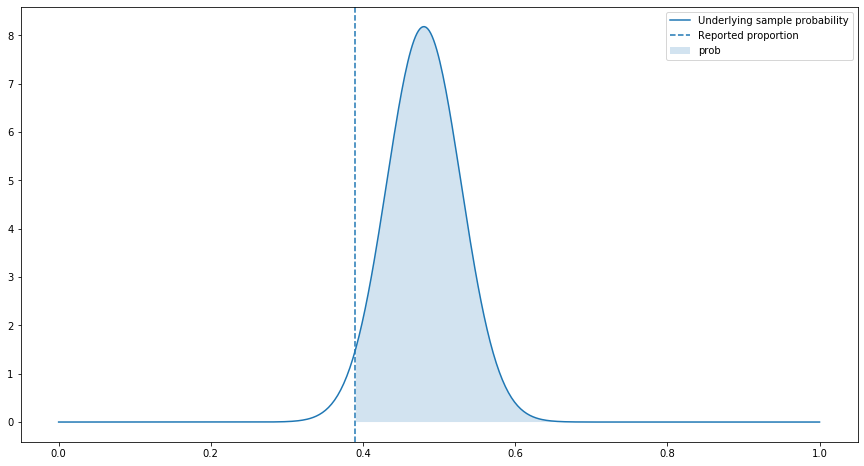

In [6]:
sigma = np.sqrt((0.39*0.61)/100)
reported = 0.39
sample = 0.48

xs = np.linspace(0,1,500)
ps = norm.pdf(xs, sample, sigma) #using 0.48 as mean and sigma as stdev
plt.figure(figsize=(15,8))
plt.plot(xs, ps, label='Underlying sample probability')
plt.axvline(reported, ls='--',label = 'Reported proportion') #draw a vertical line at 39% 
plt.fill_between(xs, ps, 0, alpha=0.2, where=xs>reported, label='prob')
plt.legend();

Here we did a gaussian centered around the sample mean, we could also have done a gaussian centered around the population mean. A gaussian distribution is symetric around the mean and the math would not change. In one case we would use the survival function and in the other case we would use the cdf. A normal distribution is symetric and we are permitted to swap the sample mean with the population mean

In case of sample mean, we use surival function and in case of population mean, we use the cdf

Our sample of 100 people have said that the true value of the people who voted for A can be described by the shaded pdf. The vertical line is the actual value of people that voted for A and everything in the shaded region is what we are interested in. 

The reason why we are interested in it is because our first question was that what is the chance that given this sample, more than 39% of people actually voted for candidate A and the election is not fair and to get the probability, we integrate in the shaded region from that line till the end 

In [7]:
prob_more = norm.sf(reported, sample, sigma) #since we are going towards the right, we use sf
print(f'There is a {100*prob_more:.1f}% chance that candidate A would have recieved more votes')

There is a 96.7% chance that candidate A would have recieved more votes


Using the z score way

In [8]:
z_score = (sample-reported)/sigma
z_score_needed_for_significance = norm.ppf(0.95)
print(f'{z_score:.3f} is larger than {z_score_needed_for_significance:.3f} so we are significant')
print(f'The p value {norm.sf(sample,reported,sigma):.3f}')

1.845 is larger than 1.645 so we are significant
The p value 0.033


Moving from 1 tailed to 2 tailed test, assumptions are same (alpha=0.05, proportions are same)

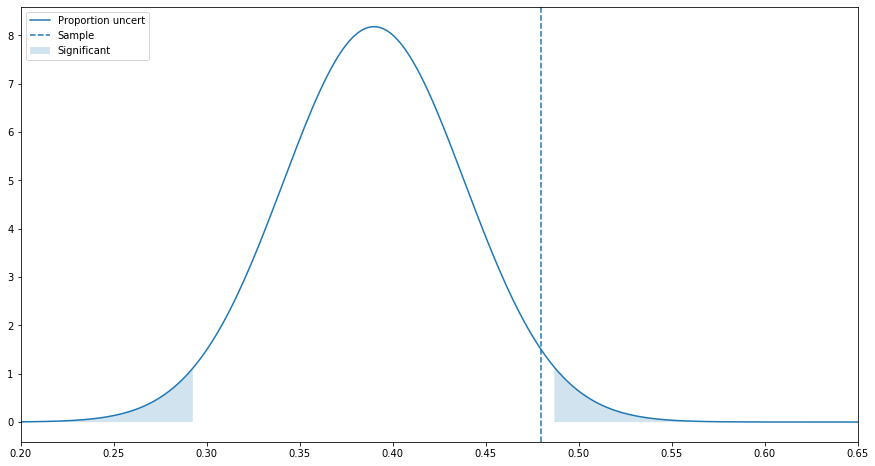

In [10]:
xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, reported, sigma)
plt.figure(figsize=(15,8))
plt.plot(xs, ps, label="Proportion uncert")
plt.axvline(sample, ls="--", label="Sample")
limits = norm.ppf([0.025, 0.975], reported, sigma)
plt.fill_between(xs, ps, 0, alpha=0.2, where=(xs<limits[0])|(xs>limits[1]), label="Significant")
plt.legend(loc=2)
plt.xlim(0.2, 0.65);

Previously we have centered the plot around the sample mean and drew a vertical line at population mean, here we have centered the plot around the population mean and drawn the vertical line at the sample mean. Here we have 2.5% fluctuations on both sides instead of having 5% fulctuation on one side only. 

Here we notice that the vertical line does not intersect the shaded region. Hence now our results are insignificant in the two tailed test

In [11]:
# Using z-scores
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.975) # for two tailed test, aplha reduces to half
print(f"{z_score:.3f} is less than {z_score_needed_for_significance:.3f}, so we aren't significant")

# Using p-values
p_value_two_tailed = 2 * norm.sf(z_score) #for p value, we multiply the value by 2 because we have two areas now 
print(f"{p_value_two_tailed:.3f} is > 0.05")

1.845 is less than 1.960, so we aren't significant
0.065 is > 0.05
